# Project Summary

*   Model 1 - Deep Neural Network
    * Train Accuracy = 1
    * Test Accuracy = 0.3507

*   Model 2 - LSTM
      * Train Accuracy = 1
      * Test Accuracy = 0.16628

*   Model 3 - GRU
      * Train Accuracy = 1
      * Test Accuracy = 0.2551
      
*   Model 4 - Stacked GRU
      * Train Accuracy = 1
      * Test Accuracy =

# Imports and Data Loading

## Import Lib

In [3]:
# Pandas and Numpy
import numpy as np
import pandas as pd

# Charting and plotting
from matplotlib import pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

# Ignore Warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [4]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [5]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Flatten, TimeDistributed, Dropout, GRU, BatchNormalization
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.preprocessing.text import Tokenizer

In [6]:
from keras import Input

In [7]:
from keras.optimizers import Adam

In [8]:
import datetime

In [9]:
import math

In [10]:
# Regular expression library
import re

In [11]:
from sklearn.preprocessing import OneHotEncoder

In [12]:
from numpy import asarray

In [13]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [14]:
import seaborn as sns

In [15]:
import random

In [16]:
# import chain
from itertools import chain

In [17]:
from pickle import load, dump

## Loading Dataset

In [18]:
path = '/content/drive/MyDrive/Mtech_Project/Dataset_Pose/Complete_landmark_IQR.csv'
df_landmark =  pd.read_csv(path)

In [19]:
df_landmark

,Unnamed: 0,POSE,IMG,TS,LEFT_WRIST_x,LEFT_WRIST_y,LEFT_THUMB_CMC_x,LEFT_THUMB_CMC_y,LEFT_THUMB_MCP_x,LEFT_THUMB_MCP_y,...,POSE_RIGHT_PINKY_y,POSE_LEFT_INDEX_x,POSE_LEFT_INDEX_y,POSE_RIGHT_INDEX_x,POSE_RIGHT_INDEX_y,POSE_LEFT_THUMB_x,POSE_LEFT_THUMB_y,POSE_RIGHT_THUMB_x,POSE_RIGHT_THUMB_y,FRAME
0,0,Poor,MVI_9740,0.0,0.554496,0.838187,0.541458,0.851108,0.535251,0.876889,...,0.886799,0.553980,0.875453,0.406508,0.889142,0.549191,0.857058,0.410023,0.873106,1.0
1,1,Poor,MVI_9740,40.0,0.554297,0.838304,0.540913,0.851934,0.535071,0.876347,...,0.895191,0.552354,0.879196,0.404798,0.897827,0.547828,0.861282,0.408076,0.881905,2.0
2,2,Poor,MVI_9740,80.0,0.554416,0.838873,0.540774,0.852190,0.534971,0.876794,...,0.900114,0.551111,0.881510,0.403723,0.902898,0.546612,0.864185,0.406815,0.886480,3.0
3,3,Poor,MVI_9740,120.0,0.554179,0.837562,0.540777,0.851432,0.535164,0.876312,...,0.900283,0.550759,0.882917,0.402930,0.903061,0.546411,0.865957,0.405994,0.887066,4.0
4,4,Poor,MVI_9740,160.0,0.554257,0.837522,0.540611,0.849596,0.534609,0.873970,...,0.901123,0.550163,0.882620,0.402751,0.903937,0.546070,0.865288,0.405875,0.887454,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146195,146195,Deaf,MVI_9580,2400.0,0.604286,0.823884,0.587952,0.834157,0.577890,0.853548,...,0.857297,0.593424,0.860416,0.459948,0.854962,0.591445,0.841620,0.463347,0.833281,81.0
146196,146196,Deaf,MVI_9580,2400.0,0.604286,0.823884,0.587952,0.834157,0.577890,0.853548,...,0.857297,0.593424,0.860416,0.459948,0.854962,0.591445,0.841620,0.463347,0.833281,82.0
146197,146197,Deaf,MVI_9580,2400.0,0.604286,0.823884,0.587952,0.834157,0.577890,0.853548,...,0.857297,0.593424,0.860416,0.459948,0.854962,0.591445,0.841620,0.463347,0.833281,83.0
146198,146198,Deaf,MVI_9580,2400.0,0.604286,0.823884,0.587952,0.834157,0.577890,0.853548,...,0.857297,0.593424,0.860416,0.459948,0.854962,0.591445,0.841620,0.463347,0.833281,84.0


## Train Test Split

In [20]:
poses = list(set(df_landmark.POSE))
print(poses)

['White', 'Parent', 'Student', 'Good_morning', 'Bedroom', 'Strong', 'Healthy', 'Man', 'Monsoon', 'Good_evening', 'Bill', 'Bathroom', 'Letter', 'Phone', 'Black', 'Manager', 'Money', 'Rich', 'Friday', 'It', 'Low', 'Pink', 'Teacher', 'Quiet', 'Lock', 'Family', 'Cool', 'Soap', 'Expensive', 'Train', 'Female', 'Week', 'Team', 'Skirt', 'Screen', 'Bed', 'President', 'Table', 'Kitchen', 'Nice', 'Spring', 'Short', 'Mouse', 'Fall', 'Wednesday', 'Boy', 'Mean', 'Animal', 'Peace', 'Grandfather', 'Male', 'Hour', 'Baby', 'Soft', 'Fan', 'Adult', 'Summer', 'Waiter', 'Soldier', 'Bird', 'Sign', 'Happy', 'Second', 'Poor', 'Dress', 'Fish', 'Photograph', 'Dirty', 'Dream', 'Attack', 'Red', 'Police', 'Famous', 'Ethnicity', 'Light', 'Priest', 'Reporter', 'Camera', 'Telephone', 'Clock', 'Job', 'Sister', 'Mother', 'Newspaper', 'Friend', 'Me', 'Ball', 'Cat', 'Box', 'High', 'Train_ticket', 'He', 'Cheap', 'Truck', 'Alive', 'Boat', 'Time', 'Blue', 'Year', 'Paper', 'Child', 'Exercise', 'Lamp', 'Orange', 'Tomorrow', 'S

In [21]:
train_imgs = list()
test_imgs = list()
for word in poses:
  imgs = list(set(df_landmark[df_landmark.POSE == word].IMG))
  random.shuffle(imgs)
  count = len(imgs)
  if count > 1:
    train_count = math.trunc(0.80*count)
    #print('Pose:',word,'|','Count:',count,'|','Train:',train_count)
    train_lst = imgs[:train_count]
    train_imgs.extend(train_lst)
    test_lst = imgs[train_count:count]
    test_imgs.extend(test_lst)
    print('Pose:',word,'|','Count:',count,'|','Train:',train_lst,'|','Test:',test_lst)
  else:
    print('Pose:',word,'|','Count:',count,'| Omited')

Pose: White | Count: 5 | Train: ['MVI_3890', 'MVI_3892', 'MVI_4043', 'MVI_8620'] | Test: ['MVI_4042']
Pose: Parent | Count: 14 | Train: ['MVI_3766', 'MVI_5084', 'MVI_3914', 'MVI_8627', 'MVI_3768', 'MVI_5085', 'MVI_4225', 'MVI_3916', 'MVI_4065', 'MVI_4064', 'MVI_5083'] | Test: ['MVI_3915', 'MVI_4063', 'MVI_3767']
Pose: Student | Count: 8 | Train: ['MVI_8870', 'MVI_4748', 'MVI_4465', 'MVI_4463', 'MVI_8869', 'MVI_4749'] | Test: ['MVI_4747', 'MVI_8868']
Pose: Good_morning | Count: 5 | Train: ['MVI_0098', 'MVI_9992', 'MVI_0099', 'MVI_0100'] | Test: ['MVI_9993']
Pose: Bedroom | Count: 2 | Train: ['MVI_4371'] | Test: ['MVI_4370']
Pose: Strong | Count: 4 | Train: ['MVI_9692', 'MVI_9690', 'MVI_9693'] | Test: ['MVI_9815']
Pose: Healthy | Count: 10 | Train: ['MVI_9366', 'MVI_9530', 'MVI_9447', 'MVI_9446', 'MVI_9532', 'MVI_9288', 'MVI_9531', 'MVI_5254'] | Test: ['MVI_9445', 'MVI_9287']
Pose: Man | Count: 7 | Train: ['MVI_4069', 'MVI_5091', 'MVI_3921', 'MVI_3772', 'MVI_3923'] | Test: ['MVI_3922', '

In [22]:
len(train_imgs)

1277

In [23]:
print(train_imgs)

['MVI_3890', 'MVI_3892', 'MVI_4043', 'MVI_8620', 'MVI_3766', 'MVI_5084', 'MVI_3914', 'MVI_8627', 'MVI_3768', 'MVI_5085', 'MVI_4225', 'MVI_3916', 'MVI_4065', 'MVI_4064', 'MVI_5083', 'MVI_8870', 'MVI_4748', 'MVI_4465', 'MVI_4463', 'MVI_8869', 'MVI_4749', 'MVI_0098', 'MVI_9992', 'MVI_0099', 'MVI_0100', 'MVI_4371', 'MVI_9692', 'MVI_9690', 'MVI_9693', 'MVI_9366', 'MVI_9530', 'MVI_9447', 'MVI_9446', 'MVI_9532', 'MVI_9288', 'MVI_9531', 'MVI_5254', 'MVI_4069', 'MVI_5091', 'MVI_3921', 'MVI_3772', 'MVI_3923', 'MVI_4671', 'MVI_4673', 'MVI_4672', 'MVI_9205', 'MVI_9207', 'MVI_0105', 'MVI_0054', 'MVI_9978', 'MVI_0106', 'MVI_005_4', 'MVI_8939', 'MVI_8673', 'MVI_8941', 'MVI_8674', 'MVI_4810', 'MVI_8940', 'MVI_8676', 'MVI_8785', 'MVI_9025', 'MVI_4379', 'MVI_9026', 'MVI_4378', 'MVI_4381', 'MVI_8783', 'MVI_8782', 'MVI_9056', 'MVI_4419', 'MVI_9055', 'MVI_8823', 'MVI_4416', 'MVI_4417', 'MVI_9054', 'MVI_4418', 'MVI_9102', 'MVI_9101', 'MVI_5394', 'MVI_8619', 'MVI_3889', 'MVI_5060', 'MVI_3888', 'MVI_8916', 'M

In [24]:
len(test_imgs)

439

In [25]:
print(test_imgs)

['MVI_4042', 'MVI_3915', 'MVI_4063', 'MVI_3767', 'MVI_4747', 'MVI_8868', 'MVI_9993', 'MVI_4370', 'MVI_9815', 'MVI_9445', 'MVI_9287', 'MVI_3922', 'MVI_4071', 'MVI_9206', 'MVI_4674', 'MVI_0107', 'MVI_0053', 'MVI_4811', 'MVI_8675', 'MVI_9027', 'MVI_8784', 'MVI_4380', 'MVI_8825', 'MVI_8824', 'MVI_8822', 'MVI_9100', 'MVI_3887', 'MVI_4785', 'MVI_4786', 'MVI_4806', 'MVI_4807', 'MVI_9597', 'MVI_9734', 'MVI_9154', 'MVI_0078', 'MVI_9661', 'MVI_3883', 'MVI_4746', 'MVI_4458', 'MVI_9539', 'MVI_9451', 'MVI_8830', 'MVI_9060', 'MVI_3934', 'MVI_8635', 'MVI_9040', 'MVI_8802', 'MVI_9748', 'MVI_9614', 'MVI_3203', 'MVI_3140', 'MVI_3110', 'MVI_9169', 'MVI_4628', 'MVI_8945', 'MVI_4275', 'MVI_4277', 'MVI_3998', 'MVI_5015', 'MVI_5403', 'MVI_9110', 'MVI_4551', 'MVI_8759', 'MVI_8758', 'MVI_4240', 'MVI_4104', 'MVI_9002', 'MVI_9003', 'MVI_4377', 'MVI_9023', 'MVI_8778', 'MVI_9590', 'MVI_5428', 'MVI_5110', 'MVI_8572', 'MVI_4162', 'MVI_3020', 'MVI_3102', 'MVI_4579', 'MVI_5435', 'MVI_9150', 'MVI_4110', 'MVI_4112', 'MV

# Preprocessing

## Remove unwanted columns

In [26]:
df_landmark.drop(columns='Unnamed: 0', inplace=True)

In [27]:
df_landmark.head()

,POSE,IMG,TS,LEFT_WRIST_x,LEFT_WRIST_y,LEFT_THUMB_CMC_x,LEFT_THUMB_CMC_y,LEFT_THUMB_MCP_x,LEFT_THUMB_MCP_y,LEFT_THUMB_IP_x,...,POSE_RIGHT_PINKY_y,POSE_LEFT_INDEX_x,POSE_LEFT_INDEX_y,POSE_RIGHT_INDEX_x,POSE_RIGHT_INDEX_y,POSE_LEFT_THUMB_x,POSE_LEFT_THUMB_y,POSE_RIGHT_THUMB_x,POSE_RIGHT_THUMB_y,FRAME
0,Poor,MVI_9740,0.0,0.554496,0.838187,0.541458,0.851108,0.535251,0.876889,0.533856,...,0.886799,0.553980,0.875453,0.406508,0.889142,0.549191,0.857058,0.410023,0.873106,1.0
1,Poor,MVI_9740,40.0,0.554297,0.838304,0.540913,0.851934,0.535071,0.876347,0.533239,...,0.895191,0.552354,0.879196,0.404798,0.897827,0.547828,0.861282,0.408076,0.881905,2.0
2,Poor,MVI_9740,80.0,0.554416,0.838873,0.540774,0.852190,0.534971,0.876794,0.533399,...,0.900114,0.551111,0.881510,0.403723,0.902898,0.546612,0.864185,0.406815,0.886480,3.0
3,Poor,MVI_9740,120.0,0.554179,0.837562,0.540777,0.851432,0.535164,0.876312,0.533345,...,0.900283,0.550759,0.882917,0.402930,0.903061,0.546411,0.865957,0.405994,0.887066,4.0
4,Poor,MVI_9740,160.0,0.554257,0.837522,0.540611,0.849596,0.534609,0.873970,0.532880,...,0.901123,0.550163,0.882620,0.402751,0.903937,0.546070,0.865288,0.405875,0.887454,5.0


# X and Y Split

In [28]:
print(list(df_landmark.columns))

['POSE', 'IMG', 'TS', 'LEFT_WRIST_x', 'LEFT_WRIST_y', 'LEFT_THUMB_CMC_x', 'LEFT_THUMB_CMC_y', 'LEFT_THUMB_MCP_x', 'LEFT_THUMB_MCP_y', 'LEFT_THUMB_IP_x', 'LEFT_THUMB_IP_y', 'LEFT_THUMB_TIP_x', 'LEFT_THUMB_TIP_y', 'LEFT_INDEX_FINGER_MCP_x', 'LEFT_INDEX_FINGER_MCP_y', 'LEFT_INDEX_FINGER_PIP_x', 'LEFT_INDEX_FINGER_PIP_y', 'LEFT_INDEX_FINGER_DIP_x', 'LEFT_INDEX_FINGER_DIP_y', 'LEFT_INDEX_FINGER_TIP_x', 'LEFT_INDEX_FINGER_TIP_y', 'LEFT_MIDDLE_FINGER_MCP_x', 'LEFT_MIDDLE_FINGER_MCP_y', 'LEFT_MIDDLE_FINGER_PIP_x', 'LEFT_MIDDLE_FINGER_PIP_y', 'LEFT_MIDDLE_FINGER_DIP_x', 'LEFT_MIDDLE_FINGER_DIP_y', 'LEFT_MIDDLE_FINGER_TIP_x', 'LEFT_MIDDLE_FINGER_TIP_y', 'LEFT_RING_FINGER_MCP_x', 'LEFT_RING_FINGER_MCP_y', 'LEFT_RING_FINGER_PIP_x', 'LEFT_RING_FINGER_PIP_y', 'LEFT_RING_FINGER_DIP_x', 'LEFT_RING_FINGER_DIP_y', 'LEFT_RING_FINGER_TIP_x', 'LEFT_RING_FINGER_TIP_y', 'LEFT_PINKY_MCP_x', 'LEFT_PINKY_MCP_y', 'LEFT_PINKY_PIP_x', 'LEFT_PINKY_PIP_y', 'LEFT_PINKY_DIP_x', 'LEFT_PINKY_DIP_y', 'LEFT_PINKY_TIP_x', 

In [29]:
df_landmark[df_landmark.IMG.isin(test_imgs)].tail()

,POSE,IMG,TS,LEFT_WRIST_x,LEFT_WRIST_y,LEFT_THUMB_CMC_x,LEFT_THUMB_CMC_y,LEFT_THUMB_MCP_x,LEFT_THUMB_MCP_y,LEFT_THUMB_IP_x,...,POSE_RIGHT_PINKY_y,POSE_LEFT_INDEX_x,POSE_LEFT_INDEX_y,POSE_RIGHT_INDEX_x,POSE_RIGHT_INDEX_y,POSE_LEFT_THUMB_x,POSE_LEFT_THUMB_y,POSE_RIGHT_THUMB_x,POSE_RIGHT_THUMB_y,FRAME
146025,Technology,MVI_4826,2440.0,0.561752,0.720647,0.551332,0.734096,0.546878,0.759086,0.544523,...,0.763651,0.557944,0.766629,0.364574,0.765522,0.552472,0.749884,0.370104,0.746917,81.0
146026,Technology,MVI_4826,2440.0,0.561752,0.720647,0.551332,0.734096,0.546878,0.759086,0.544523,...,0.763651,0.557944,0.766629,0.364574,0.765522,0.552472,0.749884,0.370104,0.746917,82.0
146027,Technology,MVI_4826,2440.0,0.561752,0.720647,0.551332,0.734096,0.546878,0.759086,0.544523,...,0.763651,0.557944,0.766629,0.364574,0.765522,0.552472,0.749884,0.370104,0.746917,83.0
146028,Technology,MVI_4826,2440.0,0.561752,0.720647,0.551332,0.734096,0.546878,0.759086,0.544523,...,0.763651,0.557944,0.766629,0.364574,0.765522,0.552472,0.749884,0.370104,0.746917,84.0
146029,Technology,MVI_4826,2440.0,0.561752,0.720647,0.551332,0.734096,0.546878,0.759086,0.544523,...,0.763651,0.557944,0.766629,0.364574,0.765522,0.552472,0.749884,0.370104,0.746917,85.0


In [30]:
X_train = df_landmark[df_landmark.IMG.isin(train_imgs)].drop(labels=['POSE','IMG','TS','FRAME'], axis=1)
y_train = df_landmark[df_landmark.IMG.isin(train_imgs)]['POSE']
X_test= df_landmark[df_landmark.IMG.isin(test_imgs)].drop(labels=['POSE','IMG','TS','FRAME'], axis=1)
y_test = df_landmark[df_landmark.IMG.isin(test_imgs)]['POSE']

In [31]:
y_train.head()

0    Poor
1    Poor
2    Poor
3    Poor
4    Poor
Name: POSE, dtype: object

# Vectorize the target variable

In [32]:
vocabulary = list(set(y_train))
vocab_size = len(vocabulary)
print("vocabulary :",vocabulary)
print("vocabulary Size:",vocab_size)

vocabulary : ['White', 'Parent', 'Student', 'Good_morning', 'Bedroom', 'Strong', 'Healthy', 'Man', 'Monsoon', 'Good_evening', 'Bill', 'Bathroom', 'Letter', 'Phone', 'Black', 'Manager', 'Money', 'Rich', 'Friday', 'It', 'Low', 'Pink', 'Teacher', 'Lock', 'Family', 'Quiet', 'Soap', 'Expensive', 'Train', 'Week', 'Team', 'Skirt', 'Screen', 'Bed', 'President', 'Table', 'Kitchen', 'Nice', 'Spring', 'Short', 'Wednesday', 'Fall', 'Mouse', 'Boy', 'Mean', 'Animal', 'Peace', 'Grandfather', 'Male', 'Hour', 'Baby', 'Soft', 'Fan', 'Adult', 'Summer', 'Waiter', 'Soldier', 'Bird', 'Sign', 'Happy', 'Second', 'Poor', 'Dress', 'Fish', 'Photograph', 'Dirty', 'Dream', 'Attack', 'Red', 'Police', 'Famous', 'Ethnicity', 'Light', 'Priest', 'Reporter', 'Camera', 'Telephone', 'Clock', 'Job', 'Sister', 'Mother', 'Newspaper', 'Friend', 'Me', 'Ball', 'Cat', 'Box', 'High', 'Train_ticket', 'He', 'Cheap', 'Truck', 'Alive', 'Boat', 'Time', 'Blue', 'Year', 'Paper', 'Exercise', 'Lamp', 'Orange', 'Tomorrow', 'Secretary', 'Ri

In [33]:
#tokenizer = Tokenizer(
#    filters='',
#    lower=True,
#    split=' ')
#tokenizer.fit_on_texts(vocabulary)

## Save/load the Tokanizer

In [34]:
# saving Tokanizer
#dump(tokenizer, open('/content/drive/MyDrive/Mtech_Project/Code/tokenizer_4B.pkl', 'wb'))

In [35]:
# Load the Tokenizer
tokenizer = load(open('/content/drive/MyDrive/Mtech_Project/Code_OLD/tokenizer_4B.pkl', 'rb'))

In [36]:
OH_enc = OneHotEncoder(handle_unknown='ignore', max_categories = vocabulary)

## Train Dataset

In [37]:
y_train.head()

0    Poor
1    Poor
2    Poor
3    Poor
4    Poor
Name: POSE, dtype: object

In [38]:
vocabulary[7]

'Man'

In [39]:
len(y_train)

108460

In [40]:
y_train_token = tokenizer.texts_to_sequences(y_train)

In [41]:
len(y_train_token)

108460

In [42]:
y_train_token[22]

[49]

In [43]:
# Testing if the Tokanization is singlular word taokens
res=[]
idx=[]
for key, i in enumerate(y_train_token):
  if len(i) == 2:
    res.append(i)
    idx.append(key)
print(res)
print(idx)

[]
[]


In [44]:
# Train Set
y_train_token = tokenizer.texts_to_sequences(y_train)
# converting 2d list into 1d
# using chain.from_iterables
flatten_list = list(chain.from_iterable(y_train_token))
y_train_df = pd.DataFrame(data = flatten_list, index = y_train.index, columns= ['POSE'])

y_train_df

,POSE
0,49
1,49
2,49
3,49
4,49
...,...
146195,166
146196,166
146197,166
146198,166


In [45]:
# Train Set

#y_train_arr = asarray(y_train)
#y_train_OH = OH_enc.fit_transform(y_train_arr.reshape(-1,1))

y_train_OH = pd.get_dummies(y_train_df.POSE, prefix='Pose')
y_train_OH.head(2)

,Pose_1,Pose_2,Pose_3,Pose_4,Pose_5,Pose_6,Pose_7,Pose_8,Pose_9,Pose_10,...,Pose_223,Pose_224,Pose_225,Pose_226,Pose_227,Pose_228,Pose_229,Pose_230,Pose_231,Pose_232
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
print('y_train_OH shape =',y_train_OH.shape)

y_train_OH shape = (108460, 232)


## Test Dataset

In [47]:
# Test Set
y_test_token = tokenizer.texts_to_sequences(y_test)
flatten_list = list(chain.from_iterable(y_test_token))
y_test_df = pd.DataFrame(data = flatten_list, index = y_test.index, columns= ['POSE'])
y_test_df

,POSE
170,97
171,97
172,97
173,97
174,97
...,...
146025,27
146026,27
146027,27
146028,27


In [48]:
# Testing if the Tokanization is singlular word taokens
res=[]
idx=[]
for key, i in enumerate(y_test_token):
  if len(i) == 0:
    res.append(i)
    idx.append(key)
print(res)
print(idx)

[]
[]


In [49]:
# Test Set
#y_test_arr = asarray(y_test)
#y_test_OH = OH_enc.fit_transform(y_test_arr.reshape(-1,1))

y_test_OH = pd.get_dummies(y_test_df.POSE, prefix='Pose')
y_test_OH.head(2)

,Pose_1,Pose_2,Pose_3,Pose_4,Pose_5,Pose_6,Pose_7,Pose_8,Pose_9,Pose_10,...,Pose_223,Pose_224,Pose_225,Pose_226,Pose_227,Pose_228,Pose_229,Pose_230,Pose_231,Pose_232
170,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
171,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
print('y_test_OH shape =',y_test_OH.shape)

y_test_OH shape = (37315, 232)


# Converting 2D to 3D Input

In [51]:
# Converting Dataframe to 3D array
X_train_vec = X_train.values
y_train_vec = y_train_OH.values
X_test_vec = X_test.values
y_test_vec = y_test_OH.values

In [52]:
# reshape input to be 3D [samples, look_back, features]
# samples -> number of videos
# look_back -> number of frames in each videos
# features -> number of columns of each frame

X_train_vec = X_train_vec.reshape(-1,85,X_train.shape[1])
y_train_vec = y_train_vec.reshape(-1,85,y_train_vec.shape[1])
X_test_vec = X_test_vec.reshape(-1,85,X_test.shape[1])
y_test_vec = y_test_vec.reshape(-1,85,y_test_vec.shape[1])

In [53]:
y_train_vec[1,0:3,:]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [54]:
y_train_vec[:,1,:].shape

(1276, 232)

In [55]:
y_train_vec_1D = y_train_vec[:,1,:]
y_test_vec_1D = y_test_vec[:,1,:]

In [56]:
print('X_train shape =',X_train_vec.shape)
print('y_train shape =',y_train_vec_1D.shape)
print('X_test shape =',X_test_vec.shape)
print('y_test shape =',y_test_vec_1D.shape)

X_train shape = (1276, 85, 130)
y_train shape = (1276, 232)
X_test shape = (439, 85, 130)
y_test shape = (439, 232)


In [57]:
print('X_train shape =',X_train_vec.shape)
print('y_train shape =',y_train_vec.shape)
print('X_test shape =',X_test_vec.shape)
print('y_test shape =',y_test_vec.shape)

X_train shape = (1276, 85, 130)
y_train shape = (1276, 85, 232)
X_test shape = (439, 85, 130)
y_test shape = (439, 85, 232)


In [58]:
X_train_vec_1D = X_train_vec.reshape(-1, X_train_vec.shape[1]*X_train_vec.shape[2])
X_test_vec_1D = X_test_vec.reshape(-1, X_test_vec.shape[1]*X_test_vec.shape[2])

In [59]:
print('X_train shape =',X_train_vec_1D.shape)
print('y_train shape =',y_train_vec_1D.shape)
print('X_test shape =',X_test_vec_1D.shape)
print('y_test shape =',y_test_vec_1D.shape)

X_train shape = (1276, 11050)
y_train shape = (1276, 232)
X_test shape = (439, 11050)
y_test shape = (439, 232)


# Model 1 - Deep Neural Network

In [ ]:
print('X_train shape =',X_train_vec_1D.shape)
print('y_train shape =',y_train_vec_1D.shape)
print('X_test shape =',X_test_vec_1D.shape)
print('y_test shape =',y_test_vec_1D.shape)

X_train shape = (1275, 11050)
y_train shape = (1275, 232)
X_test shape = (439, 11050)
y_test shape = (439, 232)


## Model Building

In [ ]:
tf.keras.backend.clear_session()

model_5B_1 = Sequential()
model_5B_1.add(Input(shape=(X_train_vec_1D.shape[1])))
model_5B_1.add(BatchNormalization())
model_5B_1.add(Dense(units=300,activation='relu'))
model_5B_1.add(Dropout(0.2))
model_5B_1.add(BatchNormalization())
model_5B_1.add(Dense(units=100,activation='relu'))
model_5B_1.add(Dropout(0.4))
model_5B_1.add(BatchNormalization())
model_5B_1.add(Dense(units=100,activation='relu'))
model_5B_1.add(Dropout(0.4))
model_5B_1.add(BatchNormalization())
model_5B_1.add(Dense(units=vocab_size,activation='softmax'))

In [ ]:
model_5B_1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
#Model Summary
model_5B_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 11050)            44200     
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 300)               3315300   
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0

In [ ]:
# Creating Checkpoints
checkpoint_filepath = '/content/drive/MyDrive/Mtech_Project/Code/5B_Model_1.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

## Training

In [ ]:
# fit network
history = model_5B_1.fit(X_train_vec_1D, y_train_vec_1D, epochs=50, batch_size=32,
                         validation_split=0.3,
                         callbacks=[model_checkpoint_callback],
                         verbose=2, shuffle=False)

Epoch 1/50
28/28 - 4s - loss: 5.6757 - accuracy: 0.0056 - val_loss: 6.1862 - val_accuracy: 0.0026 - 4s/epoch - 142ms/step
Epoch 2/50
28/28 - 1s - loss: 5.3911 - accuracy: 0.0202 - val_loss: 5.6099 - val_accuracy: 0.0026 - 982ms/epoch - 35ms/step
Epoch 3/50
28/28 - 1s - loss: 5.2970 - accuracy: 0.0224 - val_loss: 5.4299 - val_accuracy: 0.0026 - 1s/epoch - 39ms/step
Epoch 4/50
28/28 - 1s - loss: 5.1334 - accuracy: 0.0415 - val_loss: 5.3584 - val_accuracy: 0.0157 - 1s/epoch - 44ms/step
Epoch 5/50
28/28 - 1s - loss: 4.9860 - accuracy: 0.0493 - val_loss: 5.3026 - val_accuracy: 0.0183 - 1s/epoch - 43ms/step
Epoch 6/50
28/28 - 1s - loss: 4.8593 - accuracy: 0.0639 - val_loss: 5.2334 - val_accuracy: 0.0392 - 1s/epoch - 43ms/step
Epoch 7/50
28/28 - 1s - loss: 4.7574 - accuracy: 0.0852 - val_loss: 5.1586 - val_accuracy: 0.0496 - 1s/epoch - 39ms/step
Epoch 8/50
28/28 - 1s - loss: 4.5836 - accuracy: 0.0975 - val_loss: 5.1092 - val_accuracy: 0.0444 - 981ms/epoch - 35ms/step
Epoch 9/50
28/28 - 1s - l

In [ ]:
# fit network
history = model_5B_1.fit(X_train_vec_1D, y_train_vec_1D, initial_epoch=50, epochs=100, batch_size=32,
                         validation_split=0.3,
                         callbacks=[model_checkpoint_callback],
                         verbose=2, shuffle=False)

Epoch 51/100
28/28 - 1s - loss: 1.5400 - accuracy: 0.6054 - val_loss: 3.6998 - val_accuracy: 0.2298 - 1s/epoch - 46ms/step
Epoch 52/100
28/28 - 1s - loss: 1.5300 - accuracy: 0.5987 - val_loss: 3.6708 - val_accuracy: 0.2480 - 1s/epoch - 42ms/step
Epoch 53/100
28/28 - 1s - loss: 1.5600 - accuracy: 0.5874 - val_loss: 3.6506 - val_accuracy: 0.2428 - 1s/epoch - 44ms/step
Epoch 54/100
28/28 - 1s - loss: 1.4809 - accuracy: 0.6323 - val_loss: 3.6151 - val_accuracy: 0.2454 - 1s/epoch - 43ms/step
Epoch 55/100
28/28 - 2s - loss: 1.4366 - accuracy: 0.6155 - val_loss: 3.6064 - val_accuracy: 0.2559 - 2s/epoch - 57ms/step
Epoch 56/100
28/28 - 1s - loss: 1.4722 - accuracy: 0.6099 - val_loss: 3.6441 - val_accuracy: 0.2428 - 1s/epoch - 51ms/step
Epoch 57/100
28/28 - 2s - loss: 1.4489 - accuracy: 0.6289 - val_loss: 3.6439 - val_accuracy: 0.2611 - 2s/epoch - 57ms/step
Epoch 58/100
28/28 - 1s - loss: 1.4196 - accuracy: 0.6256 - val_loss: 3.6659 - val_accuracy: 0.2533 - 1s/epoch - 47ms/step
Epoch 59/100
28/

In [ ]:
# fit network
history = model_5B_1.fit(X_train_vec_1D, y_train_vec_1D, initial_epoch=100, epochs=150, batch_size=32,
                         validation_split=0.3,
                         callbacks=[model_checkpoint_callback],
                         verbose=2, shuffle=False)

Epoch 101/150
28/28 - 1s - loss: 0.7397 - accuracy: 0.7926 - val_loss: 3.9445 - val_accuracy: 0.2872 - 1s/epoch - 38ms/step
Epoch 102/150
28/28 - 1s - loss: 0.7111 - accuracy: 0.8083 - val_loss: 3.9709 - val_accuracy: 0.2794 - 912ms/epoch - 33ms/step
Epoch 103/150
28/28 - 1s - loss: 0.6880 - accuracy: 0.8229 - val_loss: 4.0878 - val_accuracy: 0.2715 - 1s/epoch - 36ms/step
Epoch 104/150
28/28 - 1s - loss: 0.7518 - accuracy: 0.7926 - val_loss: 4.0762 - val_accuracy: 0.2872 - 971ms/epoch - 35ms/step
Epoch 105/150
28/28 - 1s - loss: 0.6593 - accuracy: 0.8083 - val_loss: 4.1608 - val_accuracy: 0.2689 - 1000ms/epoch - 36ms/step
Epoch 106/150
28/28 - 1s - loss: 0.6505 - accuracy: 0.8061 - val_loss: 4.0513 - val_accuracy: 0.2637 - 1s/epoch - 44ms/step
Epoch 107/150
28/28 - 1s - loss: 0.7068 - accuracy: 0.8072 - val_loss: 4.1066 - val_accuracy: 0.2689 - 1s/epoch - 41ms/step
Epoch 108/150
28/28 - 1s - loss: 0.6813 - accuracy: 0.8061 - val_loss: 4.1190 - val_accuracy: 0.2663 - 1s/epoch - 40ms/ste

In [ ]:
# fit network
history = model_5B_1.fit(X_train_vec_1D, y_train_vec_1D, initial_epoch=150, epochs=200, batch_size=32,
                         validation_split=0.3,
                         callbacks=[model_checkpoint_callback],
                         verbose=2, shuffle=False)

Epoch 151/200
28/28 - 1s - loss: 0.4664 - accuracy: 0.8722 - val_loss: 4.4545 - val_accuracy: 0.3055 - 1s/epoch - 44ms/step
Epoch 152/200
28/28 - 1s - loss: 0.5435 - accuracy: 0.8430 - val_loss: 4.4408 - val_accuracy: 0.2846 - 1s/epoch - 42ms/step
Epoch 153/200
28/28 - 1s - loss: 0.5055 - accuracy: 0.8509 - val_loss: 4.4045 - val_accuracy: 0.3107 - 1s/epoch - 51ms/step
Epoch 154/200
28/28 - 1s - loss: 0.4817 - accuracy: 0.8509 - val_loss: 4.3963 - val_accuracy: 0.3003 - 1s/epoch - 53ms/step
Epoch 155/200
28/28 - 1s - loss: 0.5051 - accuracy: 0.8643 - val_loss: 4.3704 - val_accuracy: 0.3055 - 1s/epoch - 39ms/step
Epoch 156/200
28/28 - 1s - loss: 0.4845 - accuracy: 0.8621 - val_loss: 4.3502 - val_accuracy: 0.3055 - 967ms/epoch - 35ms/step
Epoch 157/200
28/28 - 1s - loss: 0.4958 - accuracy: 0.8520 - val_loss: 4.3800 - val_accuracy: 0.3081 - 995ms/epoch - 36ms/step
Epoch 158/200
28/28 - 1s - loss: 0.4722 - accuracy: 0.8643 - val_loss: 4.3783 - val_accuracy: 0.2977 - 950ms/epoch - 34ms/step

## Prediction

In [ ]:
model_5B_1.load_weights(checkpoint_filepath)

In [ ]:
# make a prediction
pred_prob_y_1D = model_5B_1.predict(X_test_vec_1D)
pred_val_y_1D = np.argmax(pred_prob_y_1D, axis=1)

14/14 [==============================] - 0s 11ms/step


In [ ]:
pred_prob_y_1D[3]

array([3.17418744e-06, 3.96302057e-04, 1.80588907e-03, 1.93398682e-06,
       5.11790745e-07, 1.38945925e-05, 9.63898295e-09, 8.87707574e-06,
       2.76858600e-06, 4.37314673e-09, 4.64492844e-09, 1.76967418e-08,
       7.75807365e-08, 1.04573917e-06, 1.16765420e-09, 1.64845153e-06,
       2.30488304e-08, 5.02753683e-05, 1.16597460e-06, 1.07406608e-08,
       1.03146203e-05, 1.58117782e-05, 4.67140779e-08, 1.34174450e-04,
       4.08207956e-09, 1.17558780e-08, 1.25415900e-05, 9.02467548e-07,
       8.66773771e-05, 2.59114240e-05, 2.41779902e-10, 7.97184629e-09,
       3.17257456e-02, 3.58595258e-07, 4.46607240e-09, 2.10849919e-07,
       9.41056122e-09, 1.98374224e-07, 1.85083726e-10, 5.69959440e-08,
       1.17722202e-07, 1.02128286e-06, 2.33817985e-07, 1.49441505e-04,
       8.76148806e-06, 8.09156830e-08, 3.36494530e-08, 4.43980360e-04,
       9.16177669e-05, 1.06907919e-06, 1.91752345e-03, 8.61663068e-07,
       1.43644497e-01, 3.28462733e-08, 2.22444396e-09, 3.28208330e-07,
      

In [ ]:
pred_val_y_1D[3]

220

In [ ]:
pred_prob_y_1D.shape

(439, 232)

In [ ]:
# make a prediction
pred_prob_train_y_1D = model_5B_1.predict(X_train_vec_1D)
pred_val_train_y_1D = np.argmax(pred_prob_train_y_1D, axis=1)

40/40 [==============================] - 0s 11ms/step


In [ ]:
# Convert Prediction probability to binary value
y_pred_vec_1D = np.zeros( pred_prob_y_1D.shape )
y_pred_vec_1D[np.arange(y_pred_vec_1D.shape[0]), pred_val_y_1D] = 1

print(y_pred_vec_1D)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# Convert Prediction probability to binary value
y_pred_vec_train_1D = np.zeros( pred_prob_train_y_1D.shape )
y_pred_vec_train_1D[np.arange(y_pred_vec_train_1D.shape[0]), pred_val_train_y_1D] = 1

print(y_pred_vec_train_1D)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Evaluation

In [ ]:
print('Training Accuracy Score',accuracy_score(y_pred_vec_train_1D,y_pred_vec_train_1D))

Training Accuracy Score 1.0


In [ ]:
#conf_matrix = confusion_matrix(y_test_vec_2.argmax(axis=1),y_pred_vec_2.argmax(axis=1))
print('Testing Accuracy Score',accuracy_score(y_test_vec_1D,y_pred_vec_1D))
print('Classification report \n',classification_report(y_test_vec_1D,y_pred_vec_1D))
#print('Confusion Matrix \n',conf_matrix)

Testing Accuracy Score 0.35079726651480636
Classification report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           2       0.67      1.00      0.80         2
           3       1.00      1.00      1.00         1
           4       1.00      0.50      0.67         2
           5       0.33      0.50      0.40         2
           6       0.00      0.00      0.00         1
           7       1.00      0.67      0.80         3
           8       0.00      0.00      0.00         1
           9       0.17      0.50      0.25         2
          10       0.00      0.00      0.00         3
          11       0.25      0.50      0.33         2
          12       0.25      0.50      0.33         2
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         3
          15       1.00      0.50      0.67         2
          16  

<Axes: >

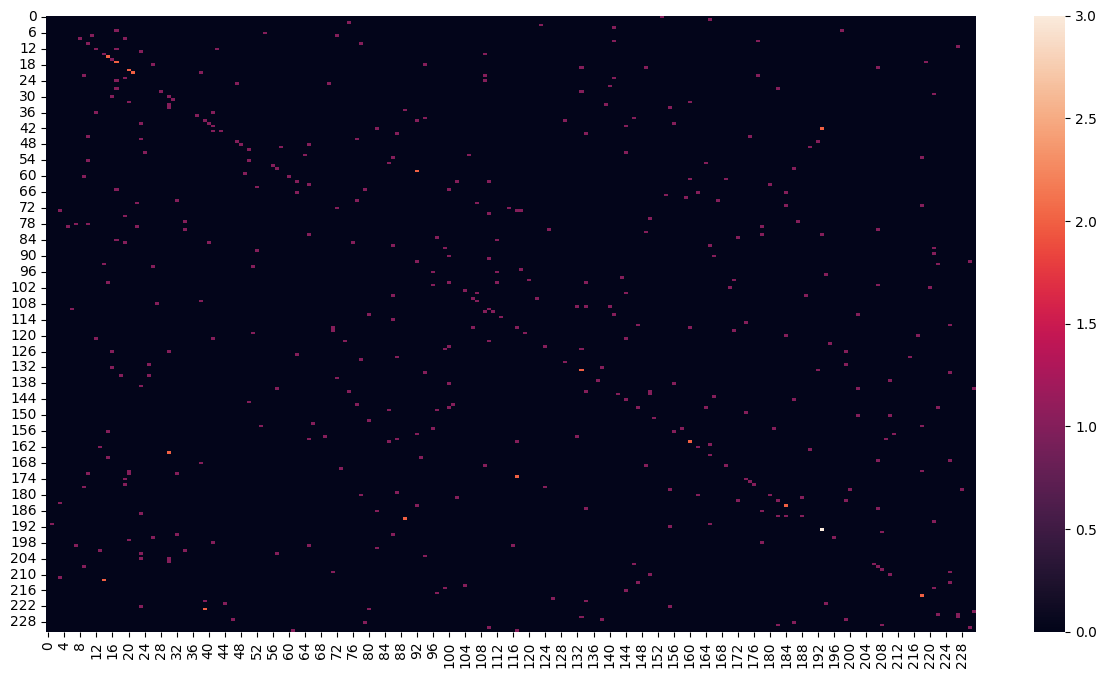

In [ ]:
sns.heatmap(conf_matrix)

# Model 2 - LSTM

In [ ]:
print('X_train shape =',X_train_vec.shape)
print('y_train shape =',y_train_vec_1D.shape)
print('X_test shape =',X_test_vec.shape)
print('y_test shape =',y_test_vec_1D.shape)

X_train shape = (1276, 85, 130)
y_train shape = (1276, 232)
X_test shape = (439, 85, 130)
y_test shape = (439, 232)


## Model Building

In [ ]:
tf.keras.backend.clear_session()

model_lstm = Sequential()
model_lstm.add(
    TimeDistributed(
        Dense(500, activation='relu'),
        input_shape=(X_train_vec.shape[1], X_train_vec.shape[2])
        ))
model_lstm.add(
    TimeDistributed(
        Dense(250, activation='relu')
        ))
model_lstm.add(
    TimeDistributed(
        Dense(150, activation='relu')
        ))
model_lstm.add(
    Bidirectional
     (
        LSTM(150, return_sequences=False, activation='relu')
        ))
model_lstm.add(Dense(units=1024,activation='relu'))
model_lstm.add(Dense(units=vocab_size,activation='softmax'))

In [ ]:
#opt = Adam(learning_rate=0.005)

In [ ]:
model_lstm.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [ ]:
#Model Summary
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 85, 500)          65500     
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 85, 250)          125250    
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 85, 150)          37650     
 tributed)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 300)              361200    
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1024)              3

In [ ]:
# Creating Checkpoints
checkpoint_filepath = '/content/drive/MyDrive/Mtech_Project/Code/5B_Model_2.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

## Training

In [ ]:
# fit network
history = model_lstm.fit(X_train_vec, y_train_vec_1D, epochs=200, batch_size=128,
                         validation_split=0.3,
                         callbacks=[model_checkpoint_callback],
                         verbose=2, shuffle=False)

Epoch 1/200
7/7 - 8s - loss: 5.4475 - accuracy: 0.0034 - val_loss: 5.4478 - val_accuracy: 0.0104 - 8s/epoch - 1s/step
Epoch 2/200
7/7 - 2s - loss: 5.3693 - accuracy: 0.0112 - val_loss: 5.4709 - val_accuracy: 0.0078 - 2s/epoch - 286ms/step
Epoch 3/200
7/7 - 2s - loss: 5.2759 - accuracy: 0.0123 - val_loss: 5.5943 - val_accuracy: 0.0026 - 2s/epoch - 281ms/step
Epoch 4/200
7/7 - 3s - loss: 6.6573 - accuracy: 0.0146 - val_loss: 5.6071 - val_accuracy: 0.0104 - 3s/epoch - 469ms/step
Epoch 5/200
7/7 - 3s - loss: 5.2478 - accuracy: 0.0146 - val_loss: 5.6688 - val_accuracy: 0.0052 - 3s/epoch - 358ms/step
Epoch 6/200
7/7 - 3s - loss: 5.1821 - accuracy: 0.0179 - val_loss: 6.1997 - val_accuracy: 0.0131 - 3s/epoch - 431ms/step
Epoch 7/200
7/7 - 2s - loss: 1595.7538 - accuracy: 0.0157 - val_loss: 5.6003 - val_accuracy: 0.0026 - 2s/epoch - 295ms/step
Epoch 8/200
7/7 - 2s - loss: 5.2564 - accuracy: 0.0202 - val_loss: 5.5671 - val_accuracy: 0.0078 - 2s/epoch - 288ms/step
Epoch 9/200
7/7 - 3s - loss: 5.2

In [ ]:
# fit network
history = model_lstm.fit(X_train_vec, y_train_vec_1D, initial_epoch=200, epochs=1000, batch_size=128,
                         validation_split=0.3,
                         callbacks=[model_checkpoint_callback],
                         verbose=2, shuffle=False)

Epoch 201/1000
7/7 - 3s - loss: 1.0959 - accuracy: 0.7052 - val_loss: 14.0232 - val_accuracy: 0.1070 - 3s/epoch - 392ms/step
Epoch 202/1000
7/7 - 2s - loss: 1.0173 - accuracy: 0.7231 - val_loss: 13.6220 - val_accuracy: 0.1097 - 2s/epoch - 291ms/step
Epoch 203/1000
7/7 - 3s - loss: 0.9766 - accuracy: 0.7422 - val_loss: 13.8089 - val_accuracy: 0.1253 - 3s/epoch - 399ms/step
Epoch 204/1000
7/7 - 2s - loss: 0.9631 - accuracy: 0.7365 - val_loss: 14.3532 - val_accuracy: 0.1070 - 2s/epoch - 285ms/step
Epoch 205/1000
7/7 - 3s - loss: 0.9354 - accuracy: 0.7534 - val_loss: 14.3822 - val_accuracy: 0.1279 - 3s/epoch - 359ms/step
Epoch 206/1000
7/7 - 4s - loss: 0.8856 - accuracy: 0.7679 - val_loss: 14.8390 - val_accuracy: 0.1070 - 4s/epoch - 504ms/step
Epoch 207/1000
7/7 - 2s - loss: 0.8625 - accuracy: 0.7724 - val_loss: 14.9767 - val_accuracy: 0.1279 - 2s/epoch - 327ms/step
Epoch 208/1000
7/7 - 2s - loss: 0.8338 - accuracy: 0.7881 - val_loss: 14.8766 - val_accuracy: 0.1201 - 2s/epoch - 324ms/step


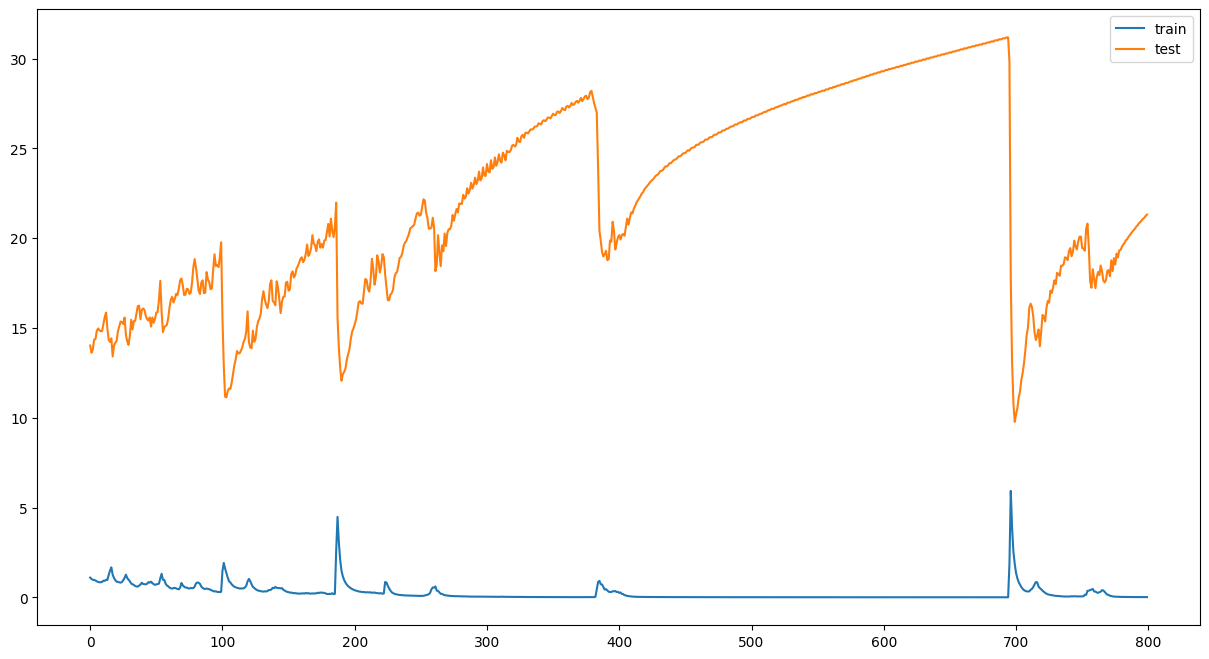

In [ ]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## Prediction

In [ ]:
model_lstm.load_weights(checkpoint_filepath)

In [ ]:
# make a prediction
pred_prob_y = model_lstm.predict(X_test_vec)
pred_val_y = np.argmax(pred_prob_y, axis=1)

14/14 [==============================] - 1s 23ms/step


In [ ]:
pred_prob_y[3]

array([1.13857964e-27, 2.55166137e-38, 1.54538348e-38, 1.26029663e-36,
       4.44683043e-30, 6.79530715e-32, 2.41217777e-33, 5.65070613e-09,
       1.04784117e-34, 2.60112156e-05, 5.98564068e-24, 0.00000000e+00,
       1.94789144e-24, 0.00000000e+00, 0.00000000e+00, 6.64333718e-33,
       0.00000000e+00, 7.35588506e-19, 4.00443639e-28, 3.00561621e-16,
       1.24716051e-26, 1.42553225e-02, 7.87933510e-15, 2.70911746e-25,
       2.29401467e-15, 1.85998120e-10, 3.97997936e-35, 0.00000000e+00,
       2.46382698e-35, 7.49657547e-23, 4.60000823e-23, 2.71843041e-13,
       4.01166811e-13, 4.04142525e-33, 5.44019588e-27, 0.00000000e+00,
       1.37256022e-14, 2.26487389e-25, 6.29704495e-15, 1.89916260e-26,
       5.27973835e-21, 1.28773247e-25, 6.29014483e-18, 5.54227389e-18,
       0.00000000e+00, 3.75356023e-22, 1.94366340e-21, 9.01428411e-12,
       1.23713194e-22, 3.17757072e-37, 5.03330138e-18, 5.56210244e-24,
       2.71652916e-16, 0.00000000e+00, 1.58821283e-21, 0.00000000e+00,
      

In [ ]:
pred_val_y[3]

177

In [ ]:
pred_prob_y.shape

(439, 232)

In [ ]:
y_test_vec_1D[3]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [ ]:
y_test_vec_1D.shape

(439, 232)

In [ ]:
# Convert Prediction probability to binary value
y_pred_vec_2 = np.zeros( pred_prob_y.shape )
y_pred_vec_2[np.arange(y_pred_vec_2.shape[0]), pred_val_y] = 1

print(y_pred_vec_2)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# make a prediction
pred_prob_train_y = model_lstm.predict(X_train_vec)
pred_val_train_y = np.argmax(pred_prob_train_y, axis=1)

14/14 [==============================] - 1s 23ms/step


In [ ]:
# Convert Prediction probability to binary value
y_pred_train_vec_2 = np.zeros( pred_prob_train_y.shape )
y_pred_train_vec_2[np.arange(y_pred_train_vec_2.shape[0]), pred_val_train_y] = 1

print(y_pred_train_vec_2)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Evaluation

In [ ]:
print('Training Accuracy Score',accuracy_score(y_pred_vec_train_1D,y_pred_vec_train_2))

Training Accuracy Score 1.0


In [ ]:
conf_matrix = confusion_matrix(y_test_vec_1D.argmax(axis=1),y_pred_vec_2.argmax(axis=1))
print('Accuracy Score',accuracy_score(y_test_vec_1D,y_pred_vec_2))
print('Classification report \n',classification_report(y_test_vec_1D,y_pred_vec_2))
print('Confusion Matrix \n',conf_matrix)

Accuracy Score 0.1662870159453303
Classification report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
           8       1.00      0.50      0.67         2
           9       0.00      0.00      0.00         2
          10       0.20      0.50      0.29         2
          11       0.00      0.00      0.00         1
          12       0.33      0.33      0.33         3
          13       0.00      0.00      0.00         1
          14       0.25      0.50      0.33         2
          15       0.40      1.00      0.57         2
          16       0.25

<Axes: >

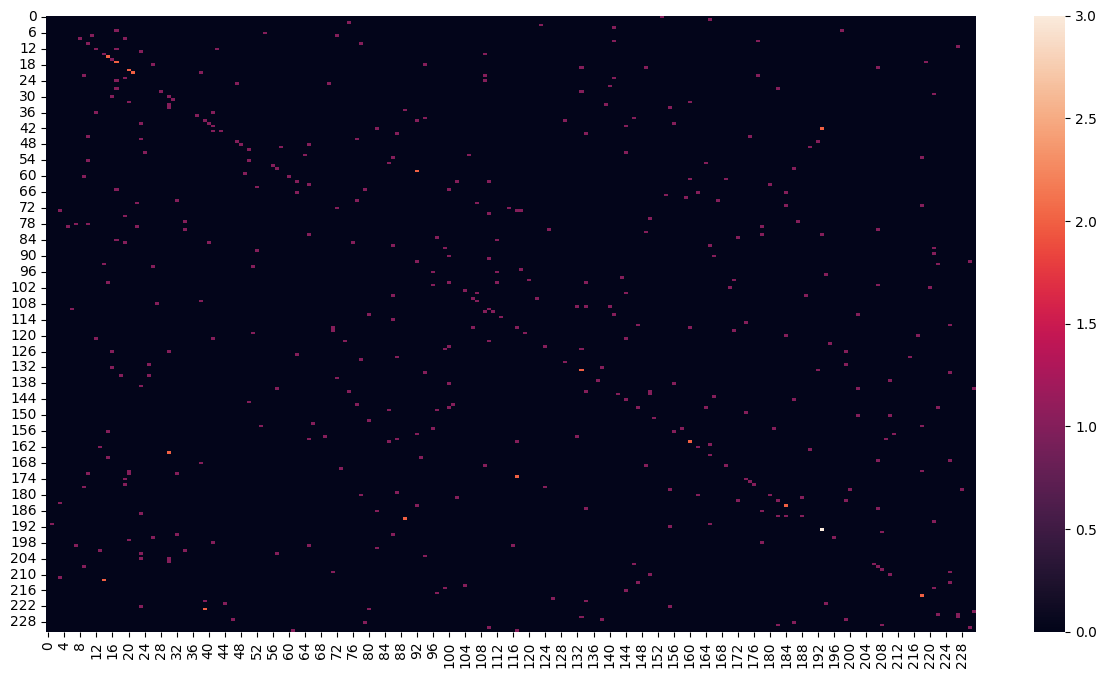

In [ ]:
sns.heatmap(conf_matrix)

# Model 3 - GRU

## Model Building

In [ ]:
tf.keras.backend.clear_session()

model_gru = Sequential()
model_gru.add(
    TimeDistributed(
        Dense(250, activation='relu'),
        input_shape=(X_train_vec.shape[1], X_train_vec.shape[2])
        ))
model_gru.add(Dropout(.2))
model_gru.add(
    TimeDistributed(
        Dense(150, activation='relu')
        ))
model_gru.add(Dropout(.2))
model_gru.add(
    TimeDistributed(
        Dense(100, activation='relu')
        ))
model_gru.add(Dropout(.2))
model_gru.add(
    TimeDistributed(
        Dense(75, activation='relu')
        ))
model_gru.add(Dropout(.2))
model_gru.add(
    TimeDistributed(
        Dense(50, activation='relu')
        ))
model_gru.add(Dropout(.2))
model_gru.add(
    TimeDistributed(
        Dense(25, activation='relu')
        ))
model_gru.add(Dropout(.2))
model_gru.add(
    TimeDistributed(
        Dense(10, activation='relu')
        ))
model_gru.add(Dropout(.2))
model_gru.add(
    Bidirectional
     (
        GRU(50, activation='relu')
        ))
model_gru.add(Dropout(.2))
model_gru.add(Dense(units=vocab_size,activation='softmax'))

In [ ]:
model_gru.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
#Model Summary
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 85, 250)          32750     
 ibuted)                                                         
                                                                 
 dropout (Dropout)           (None, 85, 250)           0         
                                                                 
 time_distributed_1 (TimeDis  (None, 85, 150)          37650     
 tributed)                                                       
                                                                 
 dropout_1 (Dropout)         (None, 85, 150)           0         
                                                                 
 time_distributed_2 (TimeDis  (None, 85, 100)          15100     
 tributed)                                                       
                                                        

In [ ]:
# Creating Checkpoints
checkpoint_filepath_3 = '/content/drive/MyDrive/Mtech_Project/Code/5B_Model_3.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath_3,
    #verbose=1,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

## Training

In [ ]:
# fit network
history_3 = model_gru.fit(X_train_vec, y_train_vec_1D, epochs=50, batch_size=128,
                         validation_split=0.3,
                         callbacks=[model_checkpoint_callback],
                         verbose=2, shuffle=False)

Epoch 1/50
7/7 - 10s - loss: 5.4480 - accuracy: 0.0034 - val_loss: 5.4482 - val_accuracy: 0.0078 - 10s/epoch - 1s/step
Epoch 2/50
7/7 - 2s - loss: 5.4403 - accuracy: 0.0078 - val_loss: 5.4481 - val_accuracy: 0.0026 - 2s/epoch - 350ms/step
Epoch 3/50
7/7 - 2s - loss: 5.4294 - accuracy: 0.0090 - val_loss: 5.4573 - val_accuracy: 0.0026 - 2s/epoch - 356ms/step
Epoch 4/50
7/7 - 4s - loss: 5.3986 - accuracy: 0.0112 - val_loss: 5.4956 - val_accuracy: 0.0000e+00 - 4s/epoch - 615ms/step
Epoch 5/50
7/7 - 2s - loss: 5.3805 - accuracy: 0.0090 - val_loss: 5.4759 - val_accuracy: 0.0026 - 2s/epoch - 357ms/step
Epoch 6/50
7/7 - 3s - loss: 5.3564 - accuracy: 0.0078 - val_loss: 5.5095 - val_accuracy: 0.0078 - 3s/epoch - 358ms/step
Epoch 7/50
7/7 - 2s - loss: 5.3445 - accuracy: 0.0168 - val_loss: 5.4820 - val_accuracy: 0.0052 - 2s/epoch - 350ms/step
Epoch 8/50
7/7 - 3s - loss: 5.3391 - accuracy: 0.0123 - val_loss: 5.5063 - val_accuracy: 0.0052 - 3s/epoch - 470ms/step
Epoch 9/50
7/7 - 5s - loss: 5.3271 - 

In [ ]:
# fit network
history_3 = model_gru.fit(X_train_vec, y_train_vec_1D, initial_epoch=50, epochs=100, batch_size=128,
                         validation_split=0.3,
                         callbacks=[model_checkpoint_callback],
                         verbose=2, shuffle=False)

Epoch 51/100
7/7 - 3s - loss: 3.5623 - accuracy: 0.1469 - val_loss: 5.7782 - val_accuracy: 0.0392 - 3s/epoch - 370ms/step
Epoch 52/100
7/7 - 3s - loss: 3.5620 - accuracy: 0.1413 - val_loss: 5.7781 - val_accuracy: 0.0366 - 3s/epoch - 358ms/step
Epoch 53/100
7/7 - 4s - loss: 3.5025 - accuracy: 0.1682 - val_loss: 5.7199 - val_accuracy: 0.0470 - 4s/epoch - 517ms/step
Epoch 54/100
7/7 - 3s - loss: 3.4365 - accuracy: 0.1603 - val_loss: 5.9208 - val_accuracy: 0.0444 - 3s/epoch - 418ms/step
Epoch 55/100
7/7 - 3s - loss: 3.3683 - accuracy: 0.1659 - val_loss: 5.8366 - val_accuracy: 0.0653 - 3s/epoch - 433ms/step
Epoch 56/100
7/7 - 2s - loss: 3.3078 - accuracy: 0.1783 - val_loss: 5.8096 - val_accuracy: 0.0574 - 2s/epoch - 354ms/step
Epoch 57/100
7/7 - 3s - loss: 3.3041 - accuracy: 0.1749 - val_loss: 5.8992 - val_accuracy: 0.0522 - 3s/epoch - 387ms/step
Epoch 58/100
7/7 - 4s - loss: 3.2536 - accuracy: 0.2085 - val_loss: 5.8066 - val_accuracy: 0.0627 - 4s/epoch - 580ms/step
Epoch 59/100
7/7 - 2s - 

In [ ]:
# fit network
history_3 = model_gru.fit(X_train_vec, y_train_vec_1D, initial_epoch=100, epochs=150, batch_size=128,
                         validation_split=0.3,
                         callbacks=[model_checkpoint_callback],
                         verbose=2, shuffle=False)

Epoch 101/150
7/7 - 3s - loss: 1.8703 - accuracy: 0.4585 - val_loss: 7.0186 - val_accuracy: 0.1332 - 3s/epoch - 379ms/step
Epoch 102/150
7/7 - 3s - loss: 1.8257 - accuracy: 0.4899 - val_loss: 7.0535 - val_accuracy: 0.1305 - 3s/epoch - 365ms/step
Epoch 103/150
7/7 - 4s - loss: 1.8037 - accuracy: 0.4720 - val_loss: 7.3495 - val_accuracy: 0.0940 - 4s/epoch - 502ms/step
Epoch 104/150
7/7 - 3s - loss: 1.9328 - accuracy: 0.4496 - val_loss: 6.9541 - val_accuracy: 0.1332 - 3s/epoch - 466ms/step
Epoch 105/150
7/7 - 3s - loss: 1.8658 - accuracy: 0.4630 - val_loss: 6.9583 - val_accuracy: 0.1175 - 3s/epoch - 359ms/step
Epoch 106/150
7/7 - 2s - loss: 1.8411 - accuracy: 0.4753 - val_loss: 7.2736 - val_accuracy: 0.1149 - 2s/epoch - 351ms/step
Epoch 107/150
7/7 - 3s - loss: 1.8140 - accuracy: 0.4776 - val_loss: 7.1377 - val_accuracy: 0.1410 - 3s/epoch - 454ms/step
Epoch 108/150
7/7 - 4s - loss: 1.7382 - accuracy: 0.4877 - val_loss: 7.2370 - val_accuracy: 0.1253 - 4s/epoch - 611ms/step
Epoch 109/150
7/

In [ ]:
# fit network
history_3 = model_gru.fit(X_train_vec, y_train_vec_1D, initial_epoch=150, epochs=250, batch_size=128,
                         validation_split=0.3,
                         callbacks=[model_checkpoint_callback],
                         verbose=2, shuffle=False)

Epoch 151/250
7/7 - 3s - loss: 1.4815 - accuracy: 0.5605 - val_loss: 7.8578 - val_accuracy: 0.1775 - 3s/epoch - 372ms/step
Epoch 152/250
7/7 - 2s - loss: 1.5045 - accuracy: 0.5605 - val_loss: 7.7621 - val_accuracy: 0.1723 - 2s/epoch - 353ms/step
Epoch 153/250
7/7 - 2s - loss: 1.4048 - accuracy: 0.5729 - val_loss: 7.8905 - val_accuracy: 0.1671 - 2s/epoch - 351ms/step
Epoch 154/250
7/7 - 4s - loss: 1.4167 - accuracy: 0.5930 - val_loss: 8.2209 - val_accuracy: 0.1645 - 4s/epoch - 621ms/step
Epoch 155/250
7/7 - 2s - loss: 1.3877 - accuracy: 0.5975 - val_loss: 8.0855 - val_accuracy: 0.1593 - 2s/epoch - 353ms/step
Epoch 156/250
7/7 - 3s - loss: 1.3108 - accuracy: 0.6200 - val_loss: 8.1026 - val_accuracy: 0.1593 - 3s/epoch - 363ms/step
Epoch 157/250
7/7 - 3s - loss: 1.2795 - accuracy: 0.6222 - val_loss: 8.2109 - val_accuracy: 0.1697 - 3s/epoch - 360ms/step
Epoch 158/250
7/7 - 3s - loss: 1.2951 - accuracy: 0.6211 - val_loss: 8.5895 - val_accuracy: 0.1749 - 3s/epoch - 374ms/step
Epoch 159/250
7/

In [ ]:
# fit network
history_3 = model_gru.fit(X_train_vec, y_train_vec_1D, initial_epoch=250, epochs=350, batch_size=128,
                         validation_split=0.3,
                         callbacks=[model_checkpoint_callback],
                         verbose=2, shuffle=False)

Epoch 251/350
7/7 - 3s - loss: 0.6989 - accuracy: 0.7791 - val_loss: 10.0684 - val_accuracy: 0.1880 - 3s/epoch - 380ms/step
Epoch 252/350
7/7 - 3s - loss: 0.6267 - accuracy: 0.8139 - val_loss: 10.1303 - val_accuracy: 0.1854 - 3s/epoch - 369ms/step
Epoch 253/350
7/7 - 4s - loss: 0.6116 - accuracy: 0.8061 - val_loss: 10.4996 - val_accuracy: 0.1984 - 4s/epoch - 566ms/step
Epoch 254/350
7/7 - 5s - loss: 0.5634 - accuracy: 0.8150 - val_loss: 10.5263 - val_accuracy: 0.2089 - 5s/epoch - 717ms/step
Epoch 255/350
7/7 - 3s - loss: 0.5868 - accuracy: 0.7993 - val_loss: 10.4401 - val_accuracy: 0.1880 - 3s/epoch - 361ms/step
Epoch 256/350
7/7 - 3s - loss: 0.6244 - accuracy: 0.8105 - val_loss: 10.3274 - val_accuracy: 0.2089 - 3s/epoch - 383ms/step
Epoch 257/350
7/7 - 3s - loss: 0.6037 - accuracy: 0.8094 - val_loss: 10.4864 - val_accuracy: 0.1854 - 3s/epoch - 379ms/step
Epoch 258/350
7/7 - 5s - loss: 0.6080 - accuracy: 0.7948 - val_loss: 10.5839 - val_accuracy: 0.1854 - 5s/epoch - 659ms/step
Epoch 25

In [ ]:
# fit network
history_3 = model_gru.fit(X_train_vec, y_train_vec_1D, initial_epoch=350, epochs=500, batch_size=128,
                         validation_split=0.3,
                         callbacks=[model_checkpoint_callback],
                         verbose=2, shuffle=False)

Epoch 351/500
7/7 - 5s - loss: 0.4005 - accuracy: 0.8767 - val_loss: 11.5186 - val_accuracy: 0.2193 - 5s/epoch - 672ms/step
Epoch 352/500
7/7 - 3s - loss: 0.3364 - accuracy: 0.9013 - val_loss: 11.7651 - val_accuracy: 0.2167 - 3s/epoch - 422ms/step
Epoch 353/500
7/7 - 3s - loss: 0.3406 - accuracy: 0.8924 - val_loss: 11.5733 - val_accuracy: 0.2298 - 3s/epoch - 363ms/step
Epoch 354/500
7/7 - 3s - loss: 0.3648 - accuracy: 0.8800 - val_loss: 11.7127 - val_accuracy: 0.2272 - 3s/epoch - 367ms/step
Epoch 355/500
7/7 - 3s - loss: 0.3307 - accuracy: 0.8857 - val_loss: 12.0784 - val_accuracy: 0.2193 - 3s/epoch - 365ms/step
Epoch 356/500
7/7 - 4s - loss: 0.3432 - accuracy: 0.8789 - val_loss: 12.1917 - val_accuracy: 0.2037 - 4s/epoch - 624ms/step
Epoch 357/500
7/7 - 3s - loss: 0.2614 - accuracy: 0.9204 - val_loss: 12.5212 - val_accuracy: 0.2245 - 3s/epoch - 358ms/step
Epoch 358/500
7/7 - 2s - loss: 0.3498 - accuracy: 0.8789 - val_loss: 12.0314 - val_accuracy: 0.2141 - 2s/epoch - 356ms/step
Epoch 35

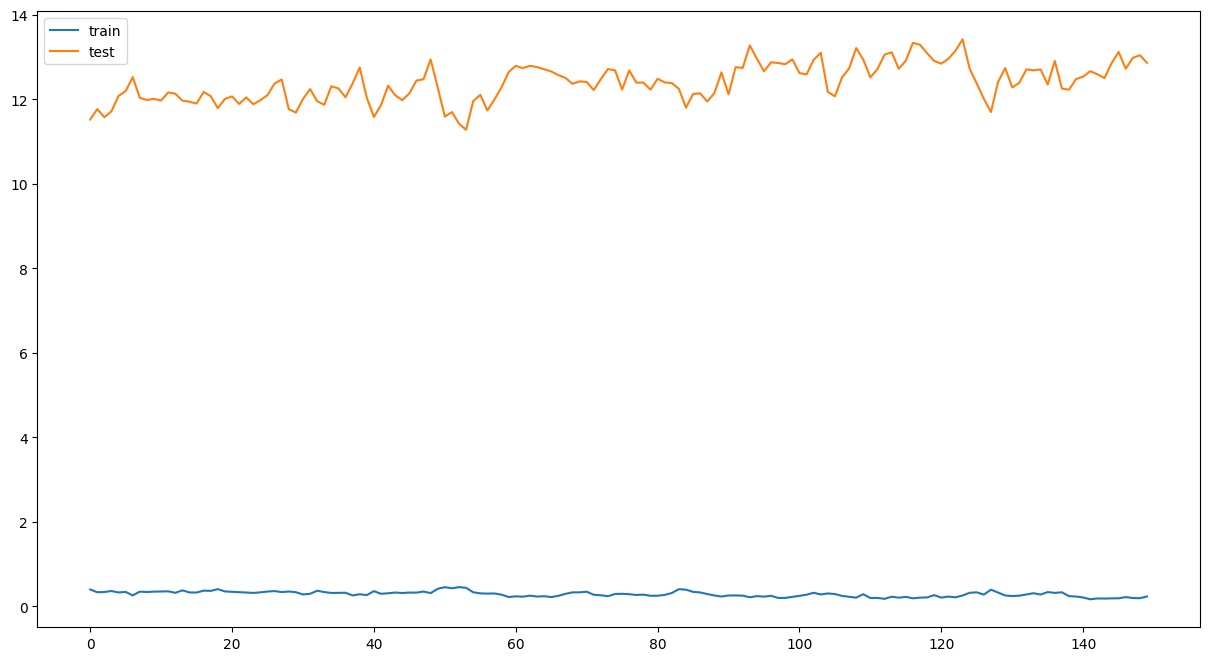

In [ ]:
# plot history
plt.plot(history_3.history['loss'], label='train')
plt.plot(history_3.history['val_loss'], label='test')
plt.legend()
plt.show()

## Prediction

In [ ]:
print(checkpoint_filepath_3)

/content/drive/MyDrive/Mtech_Project/Code/4B_Model_3.h5


In [ ]:
model_gru.load_weights(checkpoint_filepath_3)

In [ ]:
# make a prediction
pred_prob_y_3 = model_gru.predict(X_test_vec)
pred_val_y_3 = np.argmax(pred_prob_y_3, axis=1)

14/14 [==============================] - 0s 29ms/step


In [ ]:
pred_prob_y_3.shape

(439, 232)

In [ ]:
y_test_vec_1D.shape

(439, 232)

In [ ]:
# Convert Prediction probability to binary value
pred_matrix_y_3 = np.zeros( pred_prob_y_3.shape )
pred_matrix_y_3[np.arange(pred_matrix_y_3.shape[0]), pred_val_y_3] = 1

print(pred_matrix_y_3)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
# make a prediction
pred_prob_train_y = model_gru.predict(X_train_vec)
pred_val_train_y = np.argmax(pred_prob_train_y, axis=1)

14/14 [==============================] - 1s 23ms/step


In [ ]:
# Convert Prediction probability to binary value
y_pred_train_vec_3 = np.zeros( pred_prob_train_y.shape )
y_pred_train_vec_3[np.arange(y_pred_train_vec_3.shape[0]), pred_val_train_y] = 1

print(y_pred_train_vec_3)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Evaluation

In [ ]:
print('Training Accuracy Score',accuracy_score(y_pred_vec_train_1D,y_pred_train_vec_3))

Training Accuracy Score 1.0


In [ ]:
conf_matrix = confusion_matrix(y_test_vec_1D.argmax(axis=1),pred_matrix_y_3.argmax(axis=1))
print('Accuracy Score',accuracy_score(y_test_vec_1D,pred_matrix_y_3))
print('Classification report \n',classification_report(y_test_vec_1D,pred_matrix_y_3))
print('Confusion Matrix \n',conf_matrix)

Accuracy Score 0.255125284738041
Classification report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.50      1.00      0.67         2
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
           8       0.20      0.50      0.29         2
           9       0.00      0.00      0.00         2
          10       0.17      0.50      0.25         2
          11       0.00      0.00      0.00         1
          12       0.38      1.00      0.55         3
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          15       0.50      1.00      0.67         2
          16       0.00 

<Axes: >

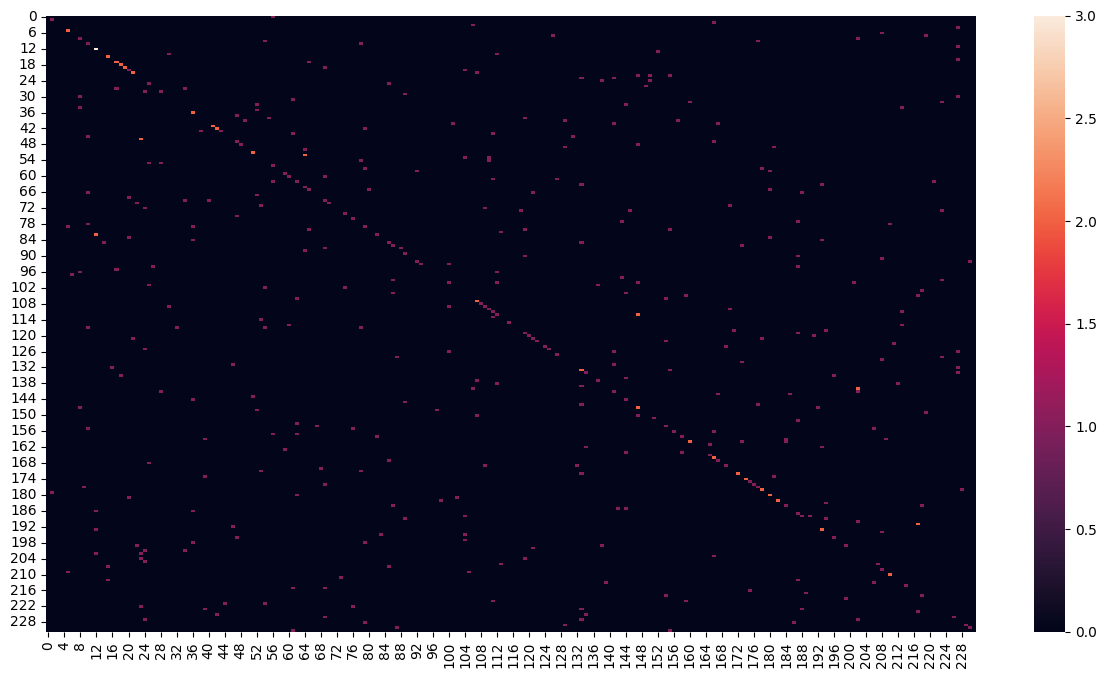

In [ ]:
sns.heatmap(conf_matrix)

# Model 4

In [61]:
print('X_train shape =',X_train_vec.shape)
print('y_train shape =',y_train_vec_1D.shape)
print('X_test shape =',X_test_vec.shape)
print('y_test shape =',y_test_vec_1D.shape)

X_train shape = (1276, 85, 130)
y_train shape = (1276, 232)
X_test shape = (439, 85, 130)
y_test shape = (439, 232)


## Model Building

In [69]:
tf.keras.backend.clear_session()

model_gru_2 = Sequential()
model_gru_2.add(
    TimeDistributed(
        Dense(10, activation='relu'),
        input_shape=(X_train_vec.shape[1], X_train_vec.shape[2])
        ))
model_gru_2.add(BatchNormalization())
model_gru_2.add(Dropout(.2))
model_gru_2.add(
    TimeDistributed(
        Dense(100, activation='relu')
        ))
model_gru_2.add(Dropout(.2))
model_gru_2.add(BatchNormalization())
model_gru_2.add(
    TimeDistributed(
        Dense(75, activation='relu')
        ))
model_gru_2.add(Dropout(.2))
model_gru_2.add(
    TimeDistributed(
        Dense(25, activation='relu')
        ))
model_gru_2.add(Dropout(.2))
model_gru_2.add(BatchNormalization())
model_gru_2.add(
    Bidirectional
     (
        GRU(10, activation='relu', return_sequences=True)
        ))
model_gru_2.add(Dropout(.2))
model_gru_2.add(BatchNormalization())
model_gru_2.add(
    Bidirectional
     (
        GRU(10, activation='relu')
        ))
model_gru_2.add(Dropout(.2))
model_gru_2.add(Dense(units=vocab_size,activation='softmax'))

In [70]:
model_gru_2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [71]:
#Model Summary
model_gru_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 85, 10)           1310      
 ibuted)                                                         
                                                                 
 batch_normalization (BatchN  (None, 85, 10)           40        
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 85, 10)            0         
                                                                 
 time_distributed_1 (TimeDis  (None, 85, 100)          1100      
 tributed)                                                       
                                                                 
 dropout_1 (Dropout)         (None, 85, 100)           0         
                                                        

In [72]:
# Creating Checkpoints
checkpoint_filepath_4 = '/content/drive/MyDrive/Mtech_Project/Code/5B_Model_4.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath_4,
    #verbose=1,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

## Training

In [73]:
tf.config.run_functions_eagerly(True)

In [74]:
# fit network
history_4 = model_gru_2.fit(X_train_vec, y_train_vec_1D, epochs=100, batch_size=32,
                         validation_split=0.3,
                         callbacks=[model_checkpoint_callback],
                         verbose=2, shuffle=False)

Epoch 1/100
28/28 - 71s - loss: 5.4548 - accuracy: 0.0045 - val_loss: 5.4461 - val_accuracy: 0.0026 - 71s/epoch - 3s/step
Epoch 2/100
28/28 - 69s - loss: 5.4127 - accuracy: 0.0090 - val_loss: 5.4449 - val_accuracy: 0.0078 - 69s/epoch - 2s/step
Epoch 3/100
28/28 - 68s - loss: 5.3930 - accuracy: 0.0078 - val_loss: 5.4440 - val_accuracy: 0.0052 - 68s/epoch - 2s/step
Epoch 4/100
28/28 - 68s - loss: 5.3653 - accuracy: 0.0056 - val_loss: 5.4457 - val_accuracy: 0.0052 - 68s/epoch - 2s/step
Epoch 5/100
28/28 - 68s - loss: 5.3294 - accuracy: 0.0123 - val_loss: 5.4439 - val_accuracy: 0.0052 - 68s/epoch - 2s/step
Epoch 6/100
28/28 - 67s - loss: 5.2898 - accuracy: 0.0123 - val_loss: 5.4408 - val_accuracy: 0.0052 - 67s/epoch - 2s/step
Epoch 7/100
28/28 - 68s - loss: 5.2165 - accuracy: 0.0168 - val_loss: 5.4682 - val_accuracy: 0.0026 - 68s/epoch - 2s/step
Epoch 8/100
28/28 - 68s - loss: 5.1961 - accuracy: 0.0090 - val_loss: 5.4541 - val_accuracy: 0.0078 - 68s/epoch - 2s/step
Epoch 9/100
28/28 - 69s 

In [ ]:
# fit network
history_4 = model_gru_2.fit(X_train_vec, y_train_vec_1D, initial_epoch=100, epochs=250,
                             batch_size=128, validation_split=0.3,
                             callbacks=[model_checkpoint_callback],
                             verbose=2, shuffle=False)

In [ ]:
# plot history
plt.plot(history_4.history['loss'], label='train')
plt.plot(history_4.history['val_loss'], label='test')
plt.legend()
plt.show()

## Prediction

In [ ]:
print(checkpoint_filepath_4)

In [ ]:
model_gru_2.load_weights(checkpoint_filepath_4)

In [ ]:
# make a prediction
pred_prob_y_4 = model_gru_2.predict(X_test_vec)
pred_val_y_4 = np.argmax(pred_prob_y_4, axis=1)

In [ ]:
pred_prob_y_4.shape

In [ ]:
y_test_vec_1D.shape

In [ ]:
# Convert Prediction probability to binary value
pred_matrix_y_4 = np.zeros( pred_prob_y_4.shape )
pred_matrix_y_4[np.arange(pred_matrix_y_4.shape[0]), pred_val_y_4] = 1

print(pred_matrix_y_4)

## Evaluation

In [ ]:
conf_matrix = confusion_matrix(y_test_vec_2.argmax(axis=1),pred_matrix_y_2.argmax(axis=1))
print('Accuracy Score',accuracy_score(y_test_vec_2,pred_matrix_y_2))
print('Classification report \n',classification_report(y_test_vec_2,pred_matrix_y_2))
print('Confusion Matrix \n',conf_matrix)

In [ ]:
sns.heatmap(conf_matrix)